In this notebook we provide some basic visualizations of Gaussian process regression, using the pykrige and sklearn libraries.

In the making is a demonstration of the convergence of wide neural networks to Gaussian processes.

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


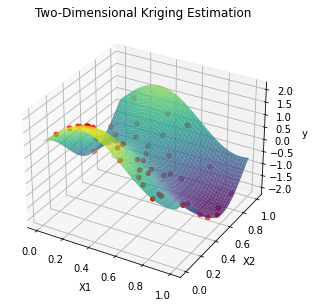

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D

# Generate some two-dimensional data
np.random.seed(0)
X = np.random.rand(50, 2)
y = np.sin(X[:, 0] * 5) + np.cos(X[:, 1] * 5)

# Define the kernel for the Gaussian Process Regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create the Gaussian Process Regressor and fit the data
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Create a grid for prediction
x_pred, y_pred = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_pred = np.column_stack((x_pred.ravel(), y_pred.ravel()))
y_pred_mean, _ = gp.predict(X_pred, return_std=True)
y_pred_mean = y_pred_mean.reshape(x_pred.shape)

# Plot the results in 3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data')
ax.plot_surface(x_pred, y_pred, y_pred_mean, cmap='viridis', alpha=0.8, label='Prediction')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.title('Two-Dimensional Kriging Estimation')
#plt.legend()
plt.show()

<ipython-input-37-de87eae660af>:26: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(label="Value",cmap='viridis')


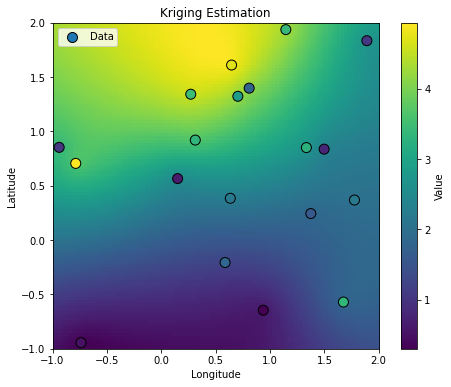

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# Create a synthetic dataset (longitude, latitude, value)
np.random.seed(0)
num_data_points = 19
data = np.column_stack([
    np.random.uniform(-1, 2, num_data_points),  # Longitude
    np.random.uniform(-1, 2, num_data_points),  # Latitude
    np.random.uniform(0, 5, num_data_points)   # Value
])

# Define the grid over which to perform kriging
gridx = np.linspace(-1, 2, 100)
gridy = np.linspace(-1, 2, 100)

# Create an Ordinary Kriging object and fit the data
ok = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model="linear")
z, ss = ok.execute("grid", gridx, gridy)

# Plot the kriging estimate
plt.figure(figsize=(8, 6))
plt.imshow(z, cmap='viridis',origin="lower", extent=(gridx.min(), gridx.max(), gridy.min(), gridy.max()))
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis', s=100, marker="o", edgecolor="k", label="Data")
plt.colorbar(label="Value",cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Kriging Estimation")
plt.legend()
plt.show()
